In [3]:
import frontmatter
from collections import defaultdict
from pathlib import Path
import git
from datetime import date
import matplotlib.pyplot as plt

plt.style.use("science")
plt.style.use("notebook")
# plt.style.use('fivethirtyeight')

In [4]:
educator_keys = [
    "mentor",
    "instructor",
    "author",
    "facilitator",
    "material",  # deprecated for author
]

educator_key_mapping = {"material": "author"}

In [8]:
repo = git.Repo("/Users/fuchur/Documents/23/git_sync/hsf.github.io/")

In [11]:
path = "_profiles"

educator_counts = defaultdict(list)
times = []

for commit in repo.iter_commits(paths=path):
    try:
        traversable = (commit.tree / "_profiles").traverse()
    except (KeyError, IndexError, ValueError):
        continue
    try:
        educator_count = defaultdict(int)
        for entry in traversable:
            content = repo.git.show("{}:{}".format(commit.hexsha, entry.path))
            try:
                dct = frontmatter.loads(content)
            except Exception:  # ParserError, where are you defined? ;)
                continue
            keys = dct.get("training_roles", [])
            if keys is None:
                continue
            roles = [r.casefold() for r in keys]
            for k in educator_keys:
                if k in roles:
                    educator_count[educator_key_mapping.get(k, k)] += 1
                else:
                    # ensure key is present
                    educator_count[educator_key_mapping.get(k, k)] += 0
            if roles:
                educator_count["all"] += 1
        print(commit, educator_count)
        for k, v in educator_count.items():
            educator_counts[k].append(v)
        times.append(commit.authored_date)
    except IndexError:
        continue

d6b6c0e0a45bbea5b21518617b70c83af15e6ac3 defaultdict(<class 'int'>, {})
893732142164c76ac62b53f3f10280b318eacddf defaultdict(<class 'int'>, {})
0b004de7f6cfd98acc1906021c047241ee2a16df defaultdict(<class 'int'>, {})
36939d66c680a9baf0e6c40daa86058de7cd3a60 defaultdict(<class 'int'>, {})
170e95ae3232a958480be4389f8aad40a2d816bf defaultdict(<class 'int'>, {})
8fb2e6b8bf3cd63d5a9ff0306525d00b0383985b defaultdict(<class 'int'>, {})
33a71e4d73247bce9d722be5e73154fb5dcf8e8d defaultdict(<class 'int'>, {})
2781ad2684b9091028333df5d74c392d7e89fe81 defaultdict(<class 'int'>, {})
800747894f24b36a9e17ad745e63d7957aafeeb8 defaultdict(<class 'int'>, {})
bb3322c07748fb9cea2c99f7aa257d30ca6d3db6 defaultdict(<class 'int'>, {})
0149b6756473be857534538364a9b7fc59fa28c7 defaultdict(<class 'int'>, {})
fe0d9cc84a243460405dc65d2369f839c4f522ed defaultdict(<class 'int'>, {})
f98c282441446e4804e4356e922693a94e099c66 defaultdict(<class 'int'>, {})
ed06f43c2ee5b74cc084dbecf2877c8a70e2f5d0 defaultdict(<class 'int

In [12]:
dt_times = [date.fromtimestamp(t) for t in times]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


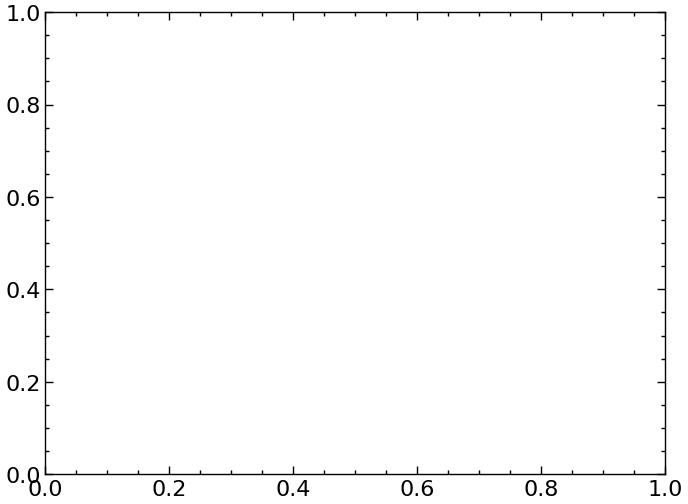

In [13]:
_, ax = plt.subplots()

for k, vs in educator_counts.items():
    if k == "all":
        continue
    print(k, vs)
    ax.plot(dt_times, vs, label=k)
ax.legend(frameon=False)

In [14]:
import pandas as pd

data_dir = Path(".").resolve().parent / "data"
assert data_dir.is_dir()

pd.Series(educator_counts["all"], index=dt_times).to_csv(
    data_dir / "total_educators.csv"
)

ValueError: Length of values (0) does not match length of index (46)